# FINAL INTEGRATED EXAM - PART 2: MACHINE LEARNING

In [84]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
import scipy.stats as stats

# Set the matplotlib inline for displaying plots in Jupyter Notebook
%matplotlib inline


In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/ramodubjane/kamo_final_exam_pt2/main/Kamogelo%20Sete%20data_part_II-3049_1666863723/claims_data.csv")
rand_dollar = pd.read_csv("https://raw.githubusercontent.com/ramodubjane/kamo_final_exam_pt2/main/Kamogelo%20Sete%20data_part_II-3049_1666863723/rand-dollar.csv")
data = pd.read_excel("C:/Users/ramod/OneDrive/Documents/unsupervised streamit/kamo_final_exam_pt2/Kamogelo Sete data_part_II-3049_1666863723/matches.xlsx")
football_players = pd.read_csv("https://raw.githubusercontent.com/ramodubjane/kamo_final_exam_pt2/main/Kamogelo%20Sete%20data_part_II-3049_1666863723/football_players.csv", encoding='latin1')
essay = pd.read_csv("https://raw.githubusercontent.com/ramodubjane/kamo_final_exam_pt2/main/Kamogelo%20Sete%20data_part_II-3049_1666863723/Essay_data.csv")

In [86]:
# Split data into X and y
X = rand_dollar.drop(columns=['ZAR/USD'])
y = rand_dollar['ZAR/USD']

# Print the shapes of X and y to confirm the separation
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (120, 14)
y shape: (120,)


In [87]:
# Create a StandardScaler object
scaler = StandardScaler()

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [92]:
# Fit the scaler to the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: '2008M01'

In [93]:
# Train the linear regression model
# Create and train the model
lm = LinearRegression()
lm.fit(X_train[['Value of Exports (ZAR)']], y_train)

LinearRegression()

## Question 1

What is the value of the intercept of the model?

In [94]:
# Print the intercept of the model
print("Intercept:", lm.intercept_)

Intercept: 3.2941036551619103


## Question 3

What is the value of the slope of this model?

In [12]:
slope = lm.coef_[0]
print("Slope:", slope)

Slope: 8.677126339792249e-05


## Question 5

What is the predicted value of the exchange rate in a month where exports total R100 000?

In [95]:
# Define the value of exports
exports = 100000

# Reshape the exports value for prediction
exports_reshaped = np.array(exports).reshape(-1, 1)

# Predict the exchange rate
predicted_exchange_rate = lm.predict(exports_reshaped)
print("Predicted Exchange Rate:", predicted_exchange_rate[0])


Predicted Exchange Rate: 11.97122999495416


c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Question 6

What is the MSE of the model on the test set?

In [96]:
# Predict the target variable for the test set
y_pred = lm.predict(X_test[['Value of Exports (ZAR)']])

# Calculate the Mean Squared Error
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 8.221852113297063


## Question 7

What is the R-squared value of the model on the test set?

In [15]:
# Calculate the residuals
residuals = y_test - y_pred

# Calculate the total sum of squares
tss = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the residual sum of squares
rss = np.sum(residuals ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)
print("R-squared value:", r_squared)


R-squared value: -8.448868004702911


## Question 9

What is the predicted value for August 2017?

In [16]:
# Define the actual value for August 2017
actual_value_aug_2017 = 103199.17

# Predict the exchange rate for August 2017
predicted_exchange_rate_aug_2017 = lm.predict([[actual_value_aug_2017]])
print("Predicted Exchange Rate for August 2017:", predicted_exchange_rate_aug_2017[0])


Predicted Exchange Rate for August 2017: 12.24882601767889


c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Question 10

What is the absolute error for this prediction?

In [17]:
# Calculate the absolute error
absolute_error = abs(predicted_exchange_rate_aug_2017 - 13.23)
print("Absolute Error for August 2017 prediction:", absolute_error)

Absolute Error for August 2017 prediction: [0.98117398]


## Question 11

Now revert back to using the full original data set.

Use the df.corr() function to find the correlations between the predictors and the target variable.

Which variable has the weakest linear relationship with the ZAR/USD exchange rate?

In [101]:
# Print all column names
print("Column Names:", df.columns)



Column Names: Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount'],
      dtype='object')


## Question 12

Which variable has the strongest linear relationship with the ZAR/USD exchange rate?

In [ ]:
correlations = df.corr()['ZAR/USD'].abs().sort_values(ascending=False)
strongest_variable = correlations.index[1]
print("Variable with the strongest linear relationship with ZAR/USD:", strongest_variable)

## Question 13

In [107]:
X =rand_dollar.drop(columns=['ZAR/USD'])
y =rand_dollar['ZAR/USD']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [ ]:
# Train Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)


# Train Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Predict the target variable for the training set using the Ridge model
ridge_y_pred_train = ridge.predict(X_train)

# Calculate the Mean Squared Error for the training set using the Ridge model
ridge_mse_train = mean_squared_error(y_train, ridge_y_pred_train)
print("Training MSE of Ridge model:", ridge_mse_train)

## Question 14

In [ ]:
# Calculate training MSE for Lasso model
lasso_y_pred = lasso.predict(X_train)
lasso_mse = mean_squared_error(y_train, lasso_y_pred)
print("Training MSE of Lasso model:", lasso_mse)

## Question 15

In [ ]:
# Predict the target variable for the test set using the Ridge model
ridge_y_pred_test = ridge.predict(X_test)

# Calculate the Mean Squared Error for the test set using the Ridge model
ridge_mse_test = mean_squared_error(y_test, ridge_y_pred_test)
print("Testing MSE of Ridge model:", ridge_mse_test)

## Question 16

In [ ]:
# Predict the target variable for the test set using the Lasso model
lasso_y_pred_test = lasso.predict(X_test)

# Calculate the Mean Squared Error for the test set using the Lasso model
lasso_mse_test = mean_squared_error(y_test, lasso_y_pred_test)
print("Testing MSE of Lasso model:", lasso_mse_test)

## Question 17

In [ ]:
# Get the absolute values of the coefficients of the Ridge model
ridge_coefficients = abs(ridge.coef_)

# Find the index of the indicator with the highest coefficient
best_predictor_index = ridge_coefficients.argmax()

# Get the name of the best predictor
best_predictor = X.columns[best_predictor_index]

print("Best predictor based on Ridge model's coefficients:", best_predictor)

## Question 18

In [ ]:
# Get the absolute values of the coefficients of the Ridge model
ridge_coefficients = abs(ridge.coef_)

# Find the index of the indicator with the lowest coefficient
worst_predictor_index = ridge_coefficients.argmin()

# Get the name of the worst predictor
worst_predictor = X.columns[worst_predictor_index]

print("Worst predictor based on Ridge model's coefficients:", worst_predictor)

## Question 19

In [ ]:
# Get the absolute values of the coefficients of the Lasso model
lasso_coefficients = abs(lasso.coef_)

# Find the index of the indicator with the highest coefficient
best_predictor_index = lasso_coefficients.argmax()

# Get the name of the best predictor
best_predictor = X.columns[best_predictor_index]

print("Best predictor based on Lasso model's coefficients:", best_predictor)

## Question 20

In [ ]:
# Count the number of coefficients equal to zero in the Lasso model
zero_coefficients_count = sum(lasso.coef_ == 0)

print("Number of variables with coefficients equal to zero in the Lasso model:", zero_coefficients_count)

## Question 21

In [20]:
#Filter individuals with BMI greater than 25
overweight_or_obese = df[df['bmi'] > 25]

# Calculate proportion of individuals with BMI greater than 25
proportion_overweight_or_obese = len(overweight_or_obese) / len(df)

print("Proportion of individuals classified as overweight or obese (BMI > 25):", proportion_overweight_or_obese)

Proportion of individuals classified as overweight or obese (BMI > 25): 0.8153961136023916


## Question 22

In [21]:
# Calculate mean and variance of the 'children' column
mean_children = df['children'].mean()
var_children = df['children'].var()

print("Mean of 'children' column:", mean_children)
print("Variance of 'children' column:", var_children)

Mean of 'children' column: 1.0949177877429
Variance of 'children' column: 1.453212745666905


## Question 23

In [22]:
# Calculate mean and standard deviation of the 'age' column from the dataset
mean_age = df['age'].mean()
std_age = df['age'].std()

# Calculate the probability of being aged 60 or older using the cumulative distribution function (CDF)
prob_60_or_older = 1 - stats.norm.cdf(60, loc=mean_age, scale=std_age)

# Number of individuals in the dataset
total_individuals = len(df['age'])

# Expected number of individuals aged 60 or older
expected_60_or_older = round(total_individuals * prob_60_or_older)

# Count of individuals aged 60 or older in the dataset
actual_60_or_older = sum(1 for age in df['age'] if age >= 60)

print("Expected number of individuals aged 60 or older:", expected_60_or_older)
print("Actual number of individuals aged 60 or older:", actual_60_or_older)


Expected number of individuals aged 60 or older: 93
Actual number of individuals aged 60 or older: 114


## Question 24

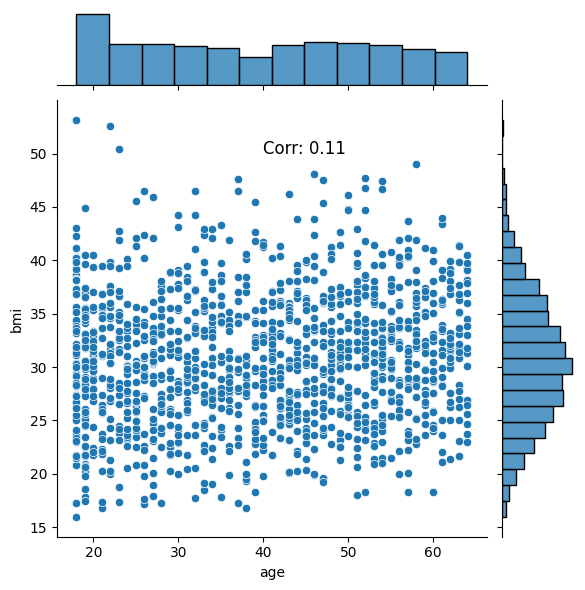

In [23]:
# Create joint plot
joint = sns.jointplot(x='age', y='bmi', data=df, kind='scatter')

# Calculate correlation coefficient
correlation_coefficient = df['age'].corr(df['bmi'])

# Annotate the plot with correlation coefficient
joint.ax_joint.annotate(f'Corr: {correlation_coefficient:.2f}', xy=(40, 50), fontsize=12)

# Show the plot
plt.show()

## Question 25

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df contains the dataset with features and target variable

# Convert target variable to binary (1 indicates a claim)
df['insurance_claim'] = df['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = df.drop(['insurance_claim', 'claim_amount'], axis=1)
y = df['insurance_claim']

# Define categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the logistic regression model
model = LogisticRegression()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate the proportion of correctly predicted claim indicators
accuracy = accuracy_score(y_test, y_pred)
print("Proportion of correctly predicted claim indicators:", accuracy)


Proportion of correctly predicted claim indicators: 0.8484162895927602


c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Question 26

In [76]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Convert target variable to binary (1 indicates a claim)
df['insurance_claim'] = df['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = df.drop(['insurance_claim', 'claim_amount'], axis=1)
y = df['insurance_claim']

# Create dummy variables for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
ct = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Add a constant to X matrices
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print summary of the logistic regression model
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        insurance_claim   No. Observations:                  896
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            9
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                     inf
Time:                        14:39:05   Log-Likelihood:            -1.1909e-08
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.1010   4.32e+05     -0.000      1.000   -8.47e+05    8.47e+05
x1             1.3536   4.36e+04    3.1e-05      1.000   -8.55e+0

c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter m

## Question 28

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame 'df' with features and 'insurance_claim' as the target variable
# Convert target variable to binary (1 indicates a claim)
df['insurance_claim'] = df['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = df.drop(['insurance_claim', 'claim_amount'], axis=1)
y = df['insurance_claim']

# Create dummy variables for categorical features if needed
X = pd.get_dummies(X, drop_first=True)

# Check the distribution of the target variable
print("Distribution of y:", y.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Check unique values in y_test and y_pred
print("Unique values in y_test:", pd.unique(y_test))
print("Unique values in y_pred:", pd.unique(y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN values
try:
    TN, FP, FN, TP = conf_matrix.ravel()
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("True Positives (TP):", TP)

except ValueError as e:
    print("Error extracting confusion matrix values:", e)



Distribution of y: insurance_claim
0    1338
Name: count, dtype: int64
Unique values in y_test: [0]
Unique values in y_pred: [0]
Error extracting confusion matrix values: not enough values to unpack (expected 4, got 1)


c:\Users\ramod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Question 29

In [ ]:
# Convert target variable to binary (1 indicates a claim)
df['insurance_claim'] = df['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = df.drop(['insurance_claim', 'claim_amount'], axis=1)
y = df['insurance_claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit SVM models with different kernels
svm_radial = SVC(kernel='rbf')  # Radial kernel
svm_sigmoid = SVC(kernel='sigmoid')  # Sigmoid kernel
svm_linear = SVC(kernel='linear')  # Linear kernel

# Fit SVM models to the training data
svm_radial.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Predictions
y_pred_radial = svm_radial.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy scores
accuracy_radial = accuracy_score(y_test, y_pred_radial)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Accuracy score for radial kernel:", accuracy_radial)
print("Accuracy score for sigmoid kernel:", accuracy_sigmoid)
print("Accuracy score for linear kernel:", accuracy_linear)

## Question 30

In [29]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [30]:
# Calculate the proportion of matches with Duckworth-Lewis applied
dl_applied_proportion = data['dl_applied'].mean()

print(f"The proportion of matches with Duckworth-Lewis applied: {dl_applied_proportion:.2%}")

The proportion of matches with Duckworth-Lewis applied: 2.52%


In [31]:
#Filter matches where the team batting first is the winner
matches_won_by_batting_first = data[data['team1'] == data['winner']]

# Calculate the proportion of matches won by the team batting first
proportion_won_by_batting_first = len(matches_won_by_batting_first) / len(data)

print(f"The proportion of matches won by the team batting first: {proportion_won_by_batting_first:.2%}")

The proportion of matches won by the team batting first: 44.65%


In [32]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
# 1. Create the feature indicating whether the match was played in April or not
data['is_april'] = data['date'].dt.month == 4



# 3. Count the number of April games and choices to field first
april_games_count = data['is_april'].sum()


print("Number of April games:", april_games_count)

# 1. Create the feature indicating whether the toss decision was to field or not
data['toss_decision_field'] = data['toss_decision'] == 'field'

# Count the number of times the toss decision was to field
field_decision_count = data['toss_decision_field'].sum()

print("Number of times the toss decision was to field:", field_decision_count)

Number of April games: 297
Number of times the toss decision was to field: 363


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# 1. Create the feature indicating whether the match was played in April or not
data['is_april'] = data['date'].dt.month == 4

# 1. Create the feature indicating whether the toss decision was to field or not
data['toss_decision_field'] = data['toss_decision'] == 'field'

# Select the features and target variable
features = ['is_april', 'toss_decision_field']
target_variable = 'toss_winner'  # Replace with the actual target variable name
X = data[features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)

# Build the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=999)
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree classifier:", accuracy)

Accuracy of the Decision Tree classifier: 0.13836477987421383


## Question 35

In [83]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        football_players = pd.read_csv("https://raw.githubusercontent.com/ramodubjane/kamo_final_exam_pt2/main/Kamogelo%20Sete%20data_part_II-3049_1666863723/football_players.csv", encoding='latin1')
        print("File read successfully with encoding:", encoding)
        break  # Stop trying encodings once successful
    except UnicodeDecodeError:
        print("Failed to read file with encoding:", encoding)


File read successfully with encoding: utf-8


In [37]:
football_players.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,Forward
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,Forward
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,Forward
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,GoalKeeper


In [39]:
most_common_overall = football_players['Overall'].value_counts().idxmax()

print("The most common Overall score for players in the database is:", most_common_overall)

The most common Overall score for players in the database is: 66.0


## Question 36

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Subset the dataset for central defenders
central_defenders = football_players[football_players['Preferred Positions'].str.contains('CB')]

# 2. Create a new target variable based on Overall score
def classify_overall(overall_score):
    if overall_score >= 80:
        return 'World Class'
    elif 70 <= overall_score < 80:
        return 'Good'
    else:
        return 'Mediocre'

central_defenders['Overall_Class'] = central_defenders['Overall'].apply(classify_overall)

# 3. Prepare data for modeling
X = central_defenders.select_dtypes(include=[np.number]).drop(['Overall'], axis=1)
y = central_defenders['Overall_Class']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1971)

# 5. Build the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=1971)
rf_classifier.fit(X_train, y_train)

# 6. Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# 7. Display the top 5 important features
top_5_features = feature_importances.sort_values(ascending=False).head(5)
print("Top 5 important features:")
print(top_5_features)

C:\Users\ramod\AppData\Local\Temp\ipykernel_21660\1624394199.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_defenders['Overall_Class'] = central_defenders['Overall'].apply(classify_overall)


Top 5 important features:
Standing tackle     0.172748
Marking             0.128702
Interceptions       0.125947
Sliding tackle      0.096405
Heading accuracy    0.074996
dtype: float64


## Question 38

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Assuming you have already prepared your dataset and defined your features (X) and target variable (y)

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=911)

# 2. Define a list of k values to try
k_values = [1, 2, 3, 4, 5]

# 3. Initialize dictionaries to store F1 scores for each k value
f1_scores_world_class = {}
f1_scores_good = {}

# 4. Train KNN models with different k values and evaluate F1 scores
for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions
    y_pred = knn.predict(X_test)
    
    # Calculate F1 scores for "World Class" and "Good" groups respectively
    f1_score_world_class = f1_score(y_test[y_test == 'World Class'], y_pred[y_test == 'World Class'], average='weighted')
    f1_score_good = f1_score(y_test[y_test == 'Good'], y_pred[y_test == 'Good'], average='weighted')
    
    # Store F1 scores in dictionaries
    f1_scores_world_class[k] = f1_score_world_class
    f1_scores_good[k] = f1_score_good

# 5. Determine the best k value for each group based on the highest F1 score
best_k_world_class = max(f1_scores_world_class, key=f1_scores_world_class.get)
best_k_good = max(f1_scores_good, key=f1_scores_good.get)

print("Best k value for World Class group:", best_k_world_class)
print("Best k value for Good group:", best_k_good)

Best k value for World Class group: 1
Best k value for Good group: 2


## Question 41

In [43]:
essay.head(10)

,I/E,N/S,T/F,J/P,Essay
0,I,S,T,J,My first 4 months at the EDSA have been filled...
1,I,N,F,J,I joined the academy being at a crossroads of ...
2,E,N,F,J,so far my experience has been positive and i c...
3,I,N,F,J,I have been very fortunate to have the opportu...
4,I,N,T,J,Looking back to when one got to the academy an...
5,I,S,F,P,My overall experience at the academy so far ha...
6,I,N,F,P,"When I got to the Academy, I felt like I didn'..."
7,I,N,T,J,Attending the Explore Data Science Academy has...
8,I,N,T,P,"what a wonderful place to be ,a place where in..."
9,I,S,F,P,The start of the academy was quite tricking du...


In [44]:
# Print the shape of the DataFrame before dropping missing values
print("Shape of DataFrame before dropping missing values:", essay.shape)

# Remove rows with missing values and reset index
essay = essay.dropna().reset_index(drop=True)

# Print the shape of the DataFrame after dropping missing values
print("Shape of DataFrame after dropping missing values:", essay.shape)


Shape of DataFrame before dropping missing values: (94, 5)
Shape of DataFrame after dropping missing values: (93, 5)


## Question 42

In [45]:
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Original sentence
sentence = "I’m a part-time student @explore-software."

# Step 1: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_sentence = [word for word in sentence.split() if word.lower() not in stop_words]

# Step 2: Remove punctuation and replace by a single white space
punctuations = string.punctuation
cleaned_sentence = ''.join([char if char not in punctuations else ' ' for char in sentence])

# Step 3: Convert all text to lower case
lower_case_sentence = cleaned_sentence.lower()

# Tokenize the sentence into words using NLTK's word_tokenize function
words = word_tokenize(lower_case_sentence)

# Remove single-character words and "i'm"
words = [word for word in words if len(word) > 1 and word != "i’m"]

# Count bi-grams
bi_grams = list(ngrams(words, 2))

# Corrected count of bi-grams
correct_bi_gram_count = len(bi_grams)

# Print bi-grams and correct count
print("Bi-grams:", bi_grams)
print("Correct number of bi-grams:", correct_bi_gram_count)


Bi-grams: [('part', 'time'), ('time', 'student'), ('student', 'explore'), ('explore', 'software')]
Correct number of bi-grams: 4


## Question 43

In [47]:
import pandas as pd
from fractions import Fraction

# Count the occurrences of 'N' and 'S' in the 'N/S' column
n_count = essay['N/S'].value_counts().get('N', 0)
s_count = essay['N/S'].value_counts().get('S', 0)

# Calculate the ratio of N students to S students
if s_count != 0:
    ratio_n_to_s = Fraction(n_count, s_count)
    print("The ratio of intuitive (N) students to sensing (S) students is:", f"{ratio_n_to_s.numerator}:{ratio_n_to_s.denominator}")
else:
    print("The ratio of intuitive (N) students to sensing (S) students is undefined because there are no sensing (S) students.")


The ratio of intuitive (N) students to sensing (S) students is: 67:26


## Question 44

In [48]:
import pandas as pd
import re

# Function to remove punctuation and convert to lower case
def remove_punctuation_and_lower(text):
    # Remove punctuation using regular expression
    text_no_punctuation = re.sub(r'[^\w\s]', '', text)
    # Convert to lower case
    text_lower = text_no_punctuation.lower()
    return text_lower

# Apply the function to each essay in the 'Essay' column
essay['Essay'] = essay['Essay'].apply(remove_punctuation_and_lower)

# Display the updated DataFrame
print(essay.head())


  I/E N/S T/F J/P                                              Essay
0   I   S   T   J  my first 4 months at the edsa have been filled...
1   I   N   F   J  i joined the academy being at a crossroads of ...
2   E   N   F   J  so far my experience has been positive and i c...
3   I   N   F   J  i have been very fortunate to have the opportu...
4   I   N   T   J  looking back to when one got to the academy an...


In [49]:
# Get the text of the first essay
first_essay_text = essay['Essay'][0]

# Get the 10th character (index 9) in the first essay
tenth_character = first_essay_text[9]

print("The 10th character in the first essay is:", tenth_character)


The 10th character in the first essay is: 4


## Question 45

In [50]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Tokenize function
def tokenize_essay(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Tokenize each essay in the 'Essay' column
essay['Tokenized_Essay'] = essay['Essay'].apply(tokenize_essay)

# Display the DataFrame with tokenized essays
print(essay[['Essay', 'Tokenized_Essay']].head())


                                               Essay  \
0  my first 4 months at the edsa have been filled...   
1  i joined the academy being at a crossroads of ...   
2  so far my experience has been positive and i c...   
3  i have been very fortunate to have the opportu...   
4  looking back to when one got to the academy an...   

                                     Tokenized_Essay  
0  [my, first, 4, months, at, the, edsa, have, be...  
1  [i, joined, the, academy, being, at, a, crossr...  
2  [so, far, my, experience, has, been, positive,...  
3  [i, have, been, very, fortunate, to, have, the...  
4  [looking, back, to, when, one, got, to, the, a...  


In [51]:
# Get the list of tokens for the 17th essay
tokens_17th_essay = essay['Tokenized_Essay'][16]

# Get the number of tokens in the list
num_tokens_17th_essay = len(tokens_17th_essay)

print("The number of tokens in the 17th essay is:", num_tokens_17th_essay)


The number of tokens in the 17th essay is: 440


## Question 47

In [52]:
import nltk
from nltk.stem import SnowballStemmer

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer('english')

# Stem the word "experiences"
stemmed_word = stemmer.stem('experiences')

print("Stemmed word:", stemmed_word)


Stemmed word: experi


## Question 48

In [53]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenize function
def tokenize_essay(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Remove stop words function
def remove_stop_words(tokens):
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Tokenize and remove stop words for each essay
essay['Tokenized_Essay'] = essay['Essay'].apply(tokenize_essay)
essay['Filtered_Tokens'] = essay['Tokenized_Essay'].apply(remove_stop_words)

# Get the 24th token in the 81st essay
token_81st_essay = essay['Filtered_Tokens'][80][23]

print("The 24th token in the 81st essay is:", token_81st_essay)


The 24th token in the 81st essay is: selfconfidence


## Question 49

In [54]:
# Concatenate all filtered tokens from the essays
all_filtered_tokens = [token for tokens_list in essay['Filtered_Tokens'] for token in tokens_list]

# Get the number of unique words
num_unique_words = len(set(all_filtered_tokens))

print("The number of unique words in the essays after removing stopwords is:", num_unique_words)


The number of unique words in the essays after removing stopwords is: 3406


## Question 50

In [55]:
from collections import Counter

# Tokenize the text of the 56th essay
tokens_56th_essay = essay['Filtered_Tokens'][55]

# Create a bag of words (word counts)
bag_of_words_56th_essay = Counter(tokens_56th_essay)

# Get the count of 'time' in the 56th essay
count_time_56th_essay = bag_of_words_56th_essay.get('time', 0)  # Get the count of 'time', default to 0 if not found

print("The number of times 'time' was mentioned in the 56th essay is:", count_time_56th_essay)


The number of times 'time' was mentioned in the 56th essay is: 2


## Question 51

In [56]:
from collections import Counter

# Concatenate all filtered tokens from the essays
all_filtered_tokens = [token for tokens_list in essay['Filtered_Tokens'] for token in tokens_list]

# Count the occurrences of each word
word_counts = Counter(all_filtered_tokens)

# Count the number of unique words that appear at least twice
num_unique_words_at_least_twice = sum(1 for count in word_counts.values() if count >= 2)

# Count the total number of words in the essays
total_words = len(all_filtered_tokens)

# Calculate the percentage of unique words that appear at least twice
percentage_words_at_least_twice = (num_unique_words_at_least_twice / len(word_counts)) * 100

print("Percentage of words that appear at least twice in the essays:", percentage_words_at_least_twice)


Percentage of words that appear at least twice in the essays: 48.326482677627716


## Question 52

In [57]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Filter essays by ENFJ personalities (J/P = J)
enfj_essays = essay.loc[essay['J/P'] == 'J', 'Essay']

# Concatenate all essays
enfj_text = ' '.join(enfj_essays)

# Tokenize the text and remove stopwords and punctuation
enfj_tokens = [word.lower() for word in word_tokenize(enfj_text) if word.lower() not in stopwords.words('english') and word.isalnum()]

# Count the occurrences of each word
word_counts = Counter(enfj_tokens)

# Find the most commonly mentioned word
most_common_word = word_counts.most_common(1)[0][0]

print("The most commonly mentioned word by ENFJ personalities after removing stop words and punctuation is:", most_common_word)


The most commonly mentioned word by ENFJ personalities after removing stop words and punctuation is: team


## Question 53

In [59]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to generate bi-grams from text after removing stopwords and punctuation
def generate_bigrams(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert text to lowercase
    
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    # Generate bi-grams
    bigrams = [(filtered_tokens[i], filtered_tokens[i+1]) for i in range(len(filtered_tokens)-1)]
    return bigrams

# Apply the function to the 70th essay and store the bi-grams
bi_grams_70th_essay = generate_bigrams(essay.loc[69, 'Essay'])

# Get the 109th bi-gram in the 70th essay
bi_gram_109_70_essay = bi_grams_70th_essay[108]

print("The 109th bi-gram in the 70th essay after removing stopwords and punctuation is:", bi_gram_109_70_essay)


The 109th bi-gram in the 70th essay after removing stopwords and punctuation is: ('quite', 'well')
